In [1]:
# !pip install -r ../requirements.txt --upgrade


In [2]:
import os
import sys

from pathlib import Path

PROJECT_PATH = os.path.abspath('..')
sys.path.append(PROJECT_PATH)


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scikit_posthocs as sp
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm


from babel.numbers import format_currency
from bioinfokit.analys import stat
from IPython.display import display, Markdown
from scipy.stats import norm
from scipy.stats import shapiro
from scipy.stats import normaltest
from statsmodels.formula.api import ols



pd.options.display.max_columns = 500
default_figsize = (16, 5)
default_figsize_small = (16, 2.5)

dataset_path = Path(PROJECT_PATH) / 'data' / 'AmesHousing.csv'

In [3]:
descricao_colunas = {
    'Order': 'Número da linha no arquivo de dados (numérico - inteiro).',
    'PID': 'Identificador único da propriedade (numérico - inteiro).',
    'MS SubClass': 'Código numérico para o tipo de moradia (numérico - inteiro).',
    'MS Zoning': 'Classificação geral de zoneamento da propriedade (categórico - nominal).',
    'Lot Frontage': 'Frente do lote em pés lineares (numérico - inteiro).',
    'Lot Area': 'Tamanho do lote em pés quadrados (numérico - inteiro).',
    'Street': 'Tipo de rua de acesso à propriedade (categórico - nominal).',
    'Alley': 'Tipo de acesso ao beco (categórico - nominal).',
    'Lot Shape': 'Formato geral da propriedade (categórico - ordinal).',
    'Land Contour': 'Planicidade do terreno (categórico - ordinal).',
    'Utilities': 'Tipo de utilitários disponíveis (categórico - ordinal).',
    'Lot Config': 'Configuração do lote (categórico - nominal).',
    'Land Slope': 'Inclinação do terreno (categórico - ordinal).',
    'Neighborhood': 'Bairro físico dentro dos limites da cidade de Ames (categórico - nominal).',
    'Condition 1': 'Proximidade a várias condições (categórico - nominal).',
    'Condition 2': 'Proximidade a várias condições (se houver mais de uma) (categórico - nominal).',
    'Bldg Type': 'Tipo de moradia (categórico - nominal).',
    'House Style': 'Estilo da moradia (categórico - nominal).',
    'Overall Qual': 'Qualidade geral do material e do acabamento (categórico - ordinal).',
    'Overall Cond': 'Avaliação geral da condição (categórico - ordinal).',
    'Year Built': 'Ano original de construção (numérico - inteiro).',
    'Year Remod/Add': 'Ano de remodelação (igual à data de construção se não houver remodelação ou adições) (numérico - inteiro).',
    'Roof Style': 'Tipo de telhado (categórico - nominal).',
    'Roof Matl': 'Tipo de cobertura do telhado (categórico - nominal).',
    'Exterior 1st': 'Tipo de revestimento exterior (categórico - nominal).',
    'Exterior 2nd': 'Tipo de revestimento exterior (se houver mais de um material) (categórico - nominal).',
    'Mas Vnr Type': 'Tipo de revestimento de alvenaria (categórico - nominal).',
    'Mas Vnr Area': 'Área de revestimento de alvenaria em pés quadrados (numérico - inteiro).',
    'Exter Qual': 'Qualidade do material exterior (categórico - ordinal).',
    'Exter Cond': 'Condição atual do material no exterior (categórico - ordinal).',
    'Foundation': 'Tipo de fundação (categórico - nominal).',
    'Bsmt Qual': 'Altura do porão (categórico - ordinal).',
    'Bsmt Cond': 'Condição geral do porão (categórico - ordinal).',
    'Bsmt Exposure': 'Paredes de porão de nível de caminhada ou jardim (categórico - ordinal).',
    'BsmtFin Type 1': 'Qualidade do acabamento da área acabada do porão (categórico - ordinal).',
    'BsmtFin SF 1': 'Pés quadrados acabados do tipo 1 (numérico - inteiro).',
    'BsmtFin Type 2': 'Qualidade do acabamento da segunda área acabada (se houver) (categórico - ordinal).',
    'BsmtFin SF 2': 'Pés quadrados acabados do tipo 2 (numérico - inteiro).',
    'Bsmt Unf SF': 'Pés quadrados inacabados da área do porão (numérico - inteiro).',
    'Total Bsmt SF': 'Pés quadrados totais da área do porão (numérico - inteiro).',
    'Heating': 'Tipo de sistema de aquecimento (categórico - nominal).',
    'Heating QC': 'Qualidade do sistema de aquecimento (categórico - ordinal).',
    'Central Air': 'Ar condicionado central (categórico - binário).',
    'Electrical': 'Sistema elétrico (categórico - ordinal).',
    '1st Flr SF': 'Pés quadrados do primeiro andar (numérico - inteiro).',
    '2nd Flr SF': 'Pés quadrados do segundo andar (numérico - inteiro).',
    'Low Qual Fin SF': 'Pés quadrados acabados de baixa qualidade (todos os andares) (numérico - inteiro).',
    'Gr Liv Area': 'Pés quadrados de área habitável acima do nível do solo (numérico - inteiro).',
    'Bsmt Full Bath': 'Banheiros completos no porão (numérico - inteiro).',
    'Bsmt Half Bath': 'Banheiros de meia no porão (numérico - inteiro).',
    'Full Bath': 'Banheiros completos acima do nível do solo (numérico - inteiro).',
    'Half Bath': 'Banheiros de meia acima do nível do solo (numérico - inteiro).',
    'Bedroom AbvGr': 'Número de quartos acima do nível do solo (numérico - inteiro).',
    'Kitchen AbvGr': 'Número de cozinhas (numérico - inteiro).',
    'Kitchen Qual': 'Qualidade da cozinha (categórico - ordinal).',
    'TotRms AbvGrd': 'Número total de cômodos acima do nível do solo (não inclui banheiros) (numérico - inteiro).',
    'Functional': 'Classificação da funcionalidade da casa (categórico - ordinal).',
    'Fireplaces': 'Número de lareiras (numérico - inteiro).',
    'Fireplace Qu': 'Qualidade da lareira (categórico - ordinal).',
    'Garage Type': 'Localização da garagem (categórico - nominal).',
    'Garage Yr Blt': 'Ano de construção da garagem (numérico - inteiro).',
    'Garage Finish': 'Acabamento interior da garagem (categórico - ordinal).',
    'Garage Cars': 'Tamanho da garagem em capacidade de carros (numérico - inteiro).',
    'Garage Area': 'Tamanho da garagem em pés quadrados (numérico - inteiro).',
    'Garage Qual': 'Qualidade da garagem (categórico - ordinal).',
    'Garage Cond': 'Condição da garagem (categórico - ordinal).',
    'Paved Drive': 'Entrada pavimentada (categórico - ordinal).',
    'Wood Deck SF': 'Área do deck de madeira em pés quadrados (numérico - inteiro).',
    'Open Porch SF': 'Área da varanda aberta em pés quadrados (numérico - inteiro).',
    'Enclosed Porch': 'Área da varanda fechada em pés quadrados (numérico - inteiro).',
    '3Ssn Porch': 'Área da varanda de 3 estações em pés quadrados (numérico - inteiro).',
    'Screen Porch': 'Área da varanda de tela em pés quadrados (numérico - inteiro).',
    'Pool Area': 'Área da piscina em pés quadrados (numérico - inteiro).',
    'Pool QC': 'Qualidade da piscina (categórico - ordinal).',
    'Fence': 'Qualidade da cerca (categórico - ordinal).',
    'Misc Feature': 'Característica extra (categórico - nominal).',
    'Misc Val': 'Valor da característica extra (numérico - inteiro).',
    'Mo Sold': 'Mês em que a casa foi vendida (numérico - inteiro).',
    'Yr Sold': 'Ano em que a casa foi vendida (numérico - inteiro).',
    'Sale Type': 'Tipo de venda (categórico - nominal).',
    'Sale Condition': 'Condição da venda (categórico - nominal).',
    'SalePrice': 'Preço de venda (numérico - inteiro).'
}

# Criar um DataFrame a partir do dicionário de descrições
df_descricao = pd.DataFrame(descricao_colunas.items(), columns=['Coluna', 'Descrição'])
df_descricao.columns = [coluna.replace(' ', '') for coluna in df_descricao.columns]

df = pd.read_csv(dataset_path)
df.columns = [coluna.replace(' ', '') for coluna in df.columns]
df.head()

,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
len(df.columns)

82

In [5]:
df.shape

(2930, 82)

# Análise Exploratória do Dados

## Preço de Venda

In [5]:
df_preco_venda = df['SalePrice'].describe().to_frame()
nulos = df['SalePrice'].isna().sum()

# exibir a d3escritiva e nulos
display(df_preco_venda)

# escrever uma pequena análise a respeito 
display(Markdown(f"""
O preço de venda das propriedades varia de R\\${df['SalePrice'].min()} a R\\${df['SalePrice'].max()}, com uma média de R\\${df['SalePrice'].mean():,.2f} e mediana de R\\${df['SalePrice'].median():,.2f}.
O desvio padrão é de R\\${df['SalePrice'].std():,.2f}.
Não existem valores nulos.
"""))



,SalePrice
count,2930.000000
mean,180796.060068
std,79886.692357
min,12789.000000
25%,129500.000000
50%,160000.000000
75%,213500.000000
max,755000.000000



O preço de venda das propriedades varia de R\$12789 a R\$755000, com uma média de R\$180,796.06 e mediana de R\$160,000.00.
O desvio padrão é de R\$79,886.69.
Não existem valores nulos.


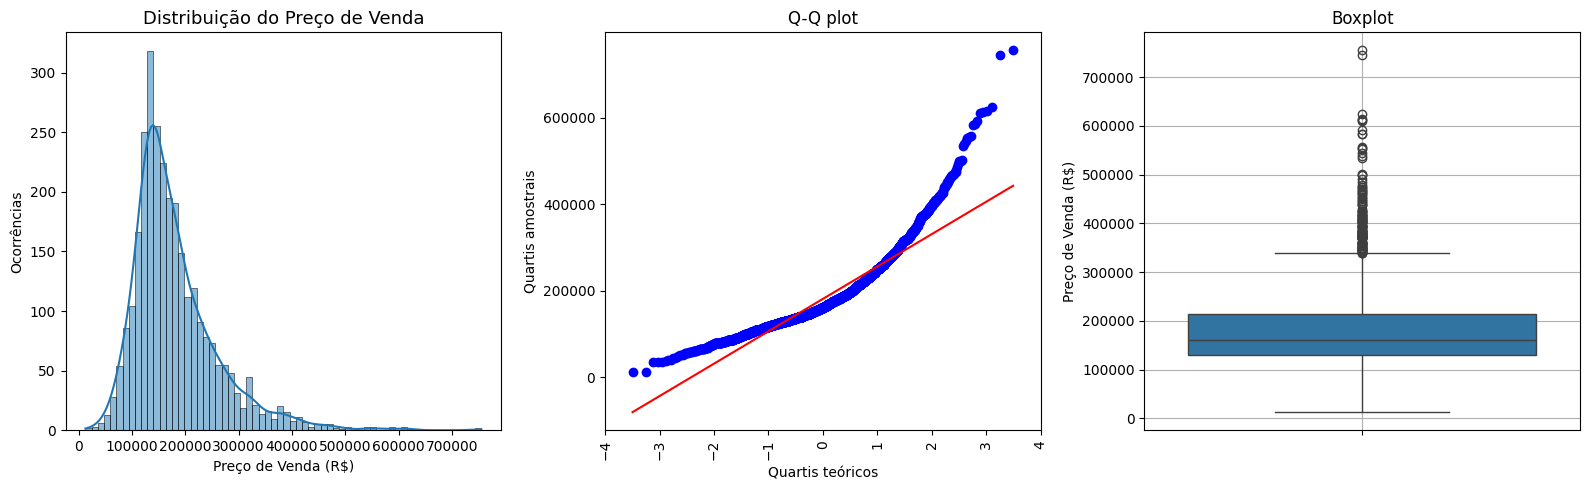

Shapiro-Wilk para a distribuição original:
Estatística=0.876, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)


In [6]:
plt.figure(figsize=default_figsize)

# Subplot 1: histograma
plt.subplot(1, 3, 1)
sns.histplot(df['SalePrice'], kde=True)
plt.title(r'Distribuição do Preço de Venda', fontsize=13)
plt.xlabel(r"Preço de Venda (R$)")
plt.ylabel('Ocorrências')

# Subplot 2: QQ-plot
plt.subplot(1, 3, 2)
stats.probplot(df['SalePrice'], dist="norm", plot=plt)
plt.xticks(ticks=np.arange(-4, 5, 1))
# girar xaxis
plt.xticks(rotation=90)
plt.title('Q-Q plot')
plt.xlabel('Quartis teóricos')
plt.ylabel('Quartis amostrais')

# Subplot 3: Boxplot
plt.subplot(1, 3, 3)
sns.boxplot(y=df['SalePrice'])
plt.title('Boxplot')
plt.ylabel('Preço de Venda (R$)')
plt.xlabel('')
plt.grid(True)

plt.tight_layout()
plt.show()

# Teste de Shapiro-Wilk 
s, p = shapiro(df['SalePrice'])
print('Shapiro-Wilk para a distribuição original:')
print('Estatística=%.3f, p=%.3f' % (s, p))
alpha = 0.05
if p > alpha:
    print('Amostra parece ser normalmente distribuída (falha em rejeitar H0)')
else:
    print('Amostra não parece ser normalmente distribuída (rejeita H0)')

## Bairro

In [7]:
df_counts = df['Neighborhood'].value_counts(dropna=False).to_frame().rename(columns={'count':'Ocorrências'})
nulos = df['Neighborhood'].isna().sum()

top = 5
top_perc = df_counts[:top].sum().iloc[0]/df_counts.sum().iloc[0]

top_bairros = list(df_counts[:top].index)
total_sales_top_perc = df[df['Neighborhood'].isin(top_bairros)]['SalePrice'].sum()/df['SalePrice'].sum()

# exibir a descritiva
display(Markdown(f"""
**Tipo de Variável**: Categórica
"""))

display(Markdown(f"""
**Ocorrências por Bairro**
"""))
display(df_counts)

# escrever uma pequena análise a respeito
display(Markdown(f"""
O bairro com maior número de ocorrências é **NAmes** com **443** registros.
Existem **28** bairros diferentes.
Existem **0** valores nulos.
Os top {top_bairros} bairros com maior número de ocorrências representam **{top_perc:.2%}** das observações e **{total_sales_top_perc:.2%}** dos valores negociados.
"""))


**Tipo de Variável**: Categórica



**Ocorrências por Bairro**


,Ocorrências
Neighborhood,
NAmes,443
CollgCr,267
OldTown,239
Edwards,194
Somerst,182
NridgHt,166
Gilbert,165
Sawyer,151
NWAmes,131



O bairro com maior número de ocorrências é **NAmes** com **443** registros.
Existem **28** bairros diferentes.
Existem **0** valores nulos.
Os top ['NAmes', 'CollgCr', 'OldTown', 'Edwards', 'Somerst'] bairros com maior número de ocorrências representam **45.22%** das observações e **40.58%** dos valores negociados.


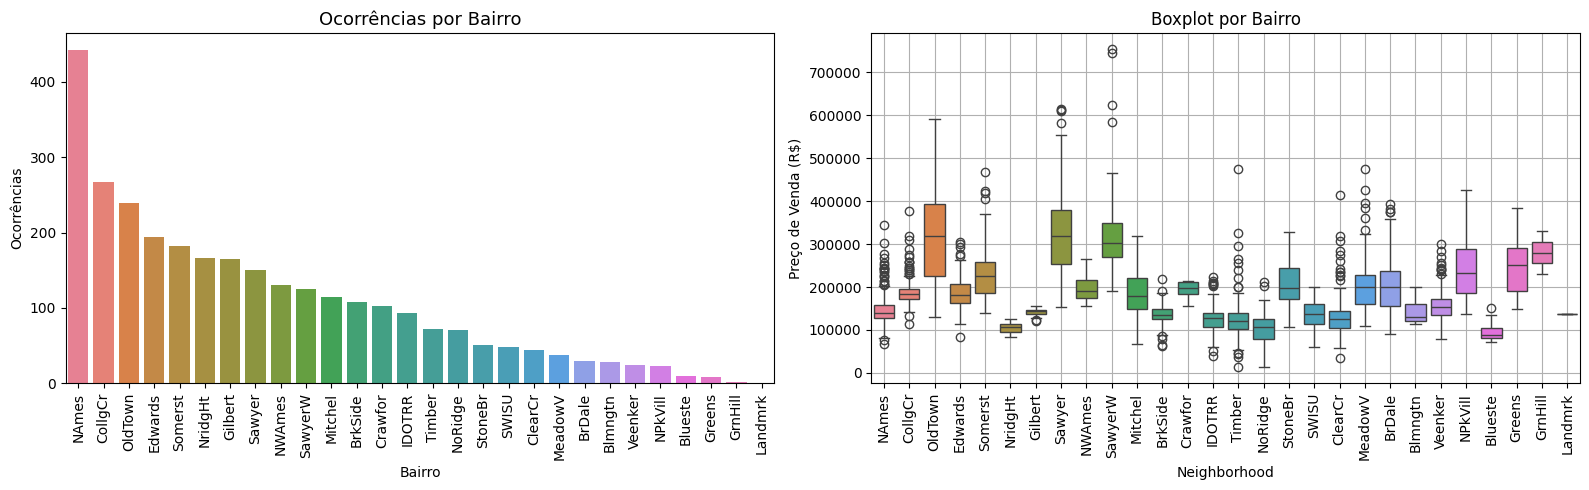

In [8]:
fig, ax = plt.subplots(1, 2, figsize=default_figsize)

# Subplot 1: histograma por bairro
plt.subplot(1, 2, 1)
sns.barplot(x='Neighborhood', y='Ocorrências', data=df_counts, ax=ax[0], hue='Neighborhood')
plt.title(r'Ocorrências por Bairro', fontsize=13)
plt.xlabel(r"Bairro")
plt.ylabel('Ocorrências')
plt.xticks(rotation=90)

# # Subplot 2: Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x='Neighborhood', y='SalePrice', data=df, ax=ax[1], hue='Neighborhood')
plt.title('Boxplot por Bairro')
plt.ylabel('Preço de Venda (R$)')
plt.xlabel('Neighborhood')
plt.xticks(ticks=range(len(df_counts.index)), labels=df_counts.index, rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

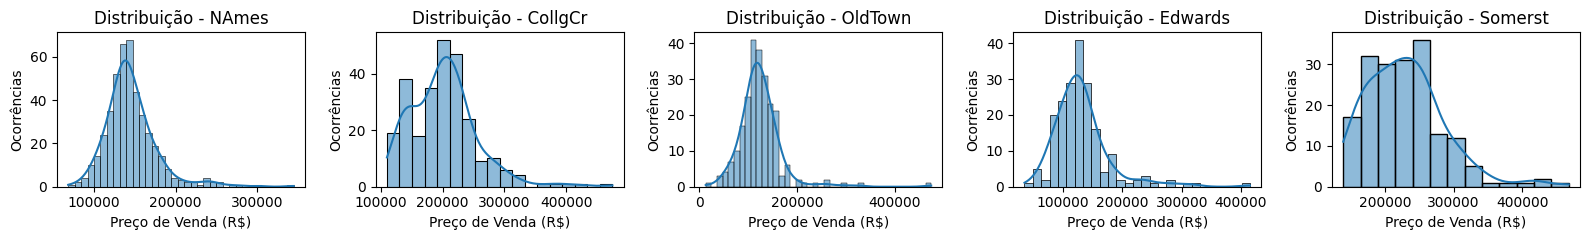

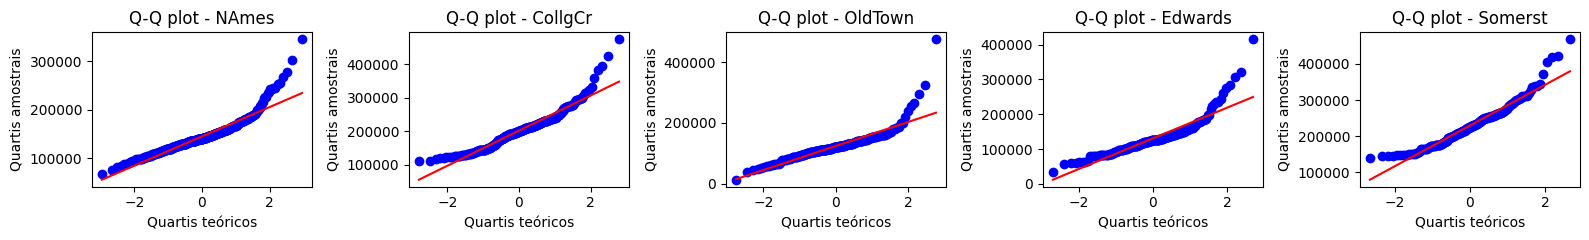

#### Shapiro - Bairros

Shapiro-Wilk para a distribuição do bairro NAmes:
Estatística=0.893, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Shapiro-Wilk para a distribuição do bairro CollgCr:
Estatística=0.928, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Shapiro-Wilk para a distribuição do bairro OldTown:
Estatística=0.800, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Shapiro-Wilk para a distribuição do bairro Edwards:
Estatística=0.837, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Shapiro-Wilk para a distribuição do bairro Somerst:
Estatística=0.939, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)


#### Kolmogorov-Smirnov - Bairros

Kolmogorov-Smirnov para a distribuição do bairro NAmes:
Estatística=1.000, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Kolmogorov-Smirnov para a distribuição do bairro CollgCr:
Estatística=1.000, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Kolmogorov-Smirnov para a distribuição do bairro OldTown:
Estatística=1.000, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Kolmogorov-Smirnov para a distribuição do bairro Edwards:
Estatística=1.000, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Kolmogorov-Smirnov para a distribuição do bairro Somerst:
Estatística=1.000, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)


In [9]:
# imprimir o histograma e distribuição de cada um dos top bairros selecionados
fig, ax = plt.subplots(1, 5, figsize=default_figsize_small)

for i, categoria in enumerate(top_bairros):
    plt.subplot(1, 5, i+1)
    sns.histplot(df[df['Neighborhood'] == categoria]['SalePrice'], kde=True)
    plt.title(f'Distribuição - {categoria}')
    plt.xlabel('Preço de Venda (R$)')
    plt.ylabel('Ocorrências')

plt.tight_layout()
plt.show()

# fazer o qq plot para cada um dos top bairros selecionados
fig, ax = plt.subplots(1, 5, figsize=default_figsize_small)

for i, categoria in enumerate(top_bairros):
    plt.subplot(1, 5, i+1)
    stats.probplot(df[df['Neighborhood'] == categoria]['SalePrice'], dist="norm", plot=plt)
    plt.title(f'Q-Q plot - {categoria}')
    plt.xlabel('Quartis teóricos')
    plt.ylabel('Quartis amostrais')

plt.tight_layout()
plt.show()

# Teste de Shapiro-Wilk para cada um dos top bairros selecionados
display(Markdown('#### Shapiro - Bairros'))
for categoria in top_bairros:
    s, p = shapiro(df[df['Neighborhood'] == categoria]['SalePrice'])
    print(f'Shapiro-Wilk para a distribuição do bairro {categoria}:')
    print(f'Estatística={s:.3f}, p={p:.3f}')
    alpha = 0.05
    if p > alpha:
        print('Amostra parece ser normalmente distribuída (falha em rejeitar H0)')
    else:
        print('Amostra não parece ser normalmente distribuída (rejeita H0)')


# Teste de Kolmogorov-Smirnov para cada um dos top bairros selecionados
display(Markdown('#### Kolmogorov-Smirnov - Bairros'))
for categoria in top_bairros:
    s, p = stats.kstest(df[df['Neighborhood'] == categoria]['SalePrice'], 'norm')
    print(f'Kolmogorov-Smirnov para a distribuição do bairro {categoria}:')
    print(f'Estatística={s:.3f}, p={p:.3f}')
    alpha = 0.05
    if p > alpha:
        print('Amostra parece ser normalmente distribuída (falha em rejeitar H0)')
    else:
        print('Amostra não parece ser normalmente distribuída (rejeita H0)')



## Inclinação do Terreno


**Tipo de Variável**: Categórica Ordinal \
**Valores Nulos**: 0



**Ocorrências por Inclinação do Terreno**


,Ocorrências
LandSlope,
Gtl,2789
Mod,125
Sev,16



**Gtl (Gentle):** Indica uma inclinação suave ou leve. O terreno é relativamente plano, apresentando uma declividade reduzida. É o tipo de área onde é mais fácil construir e implantar projetos agrícolas, pois o escoamento superficial de água é mais lento e a terra tende a ser mais estável.

**Mod (Moderate):** Refere-se a uma inclinação moderada. Aqui o terreno já apresenta uma inclinação perceptível, o que exige mais cuidados em construções e no uso do solo (por exemplo, técnicas de terraceamento ou controle de erosão). Ainda é possível utilizar esse tipo de relevo para agricultura, construção e outras atividades, porém com planejamento mais criterioso.

**Sev (Severe):** Significa uma inclinação acentuada. Trata-se de terrenos bastante íngremes, onde as atividades agrícolas, de construção e até deslocamento são dificultadas. Nessas áreas, existe maior risco de erosão, deslizamentos e outros problemas geotécnicos, sendo necessário adotar medidas específicas para estabilização do solo e drenagem, ou até mesmo evitar determinadas intervenções.


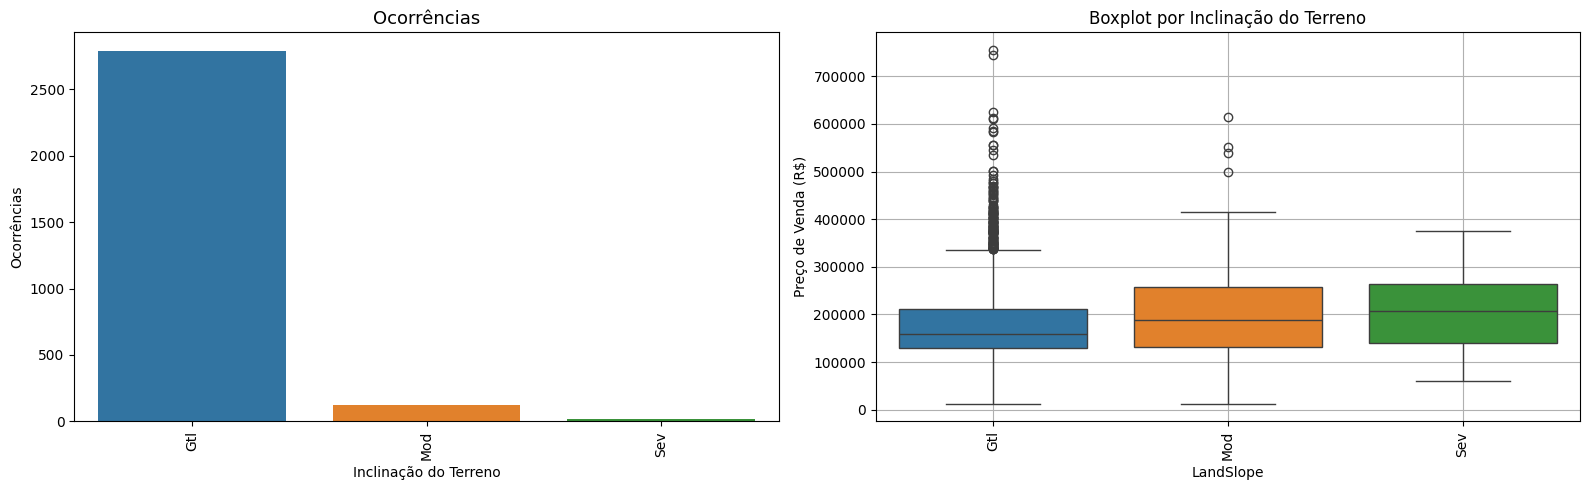

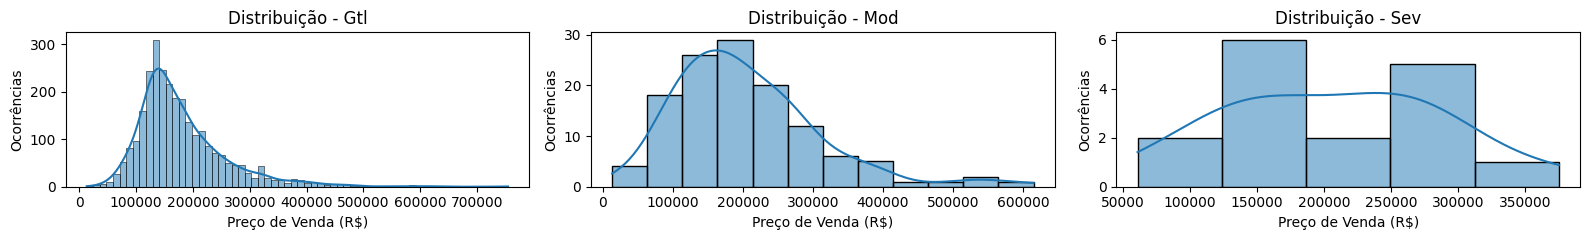

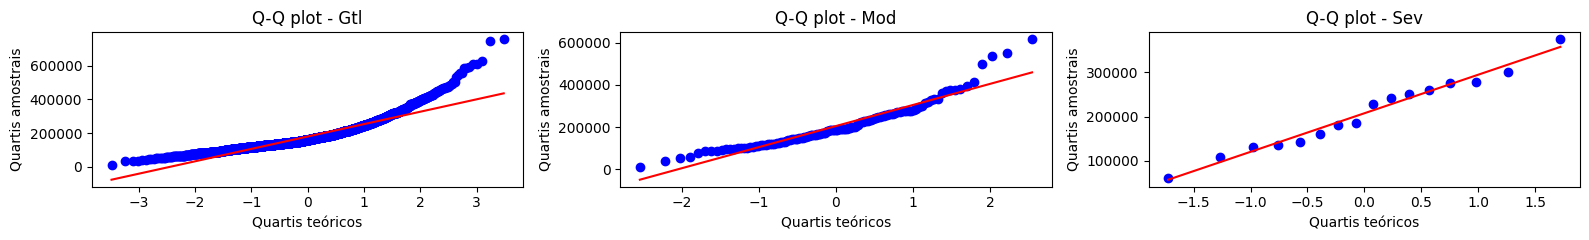

#### Shapiro - Inclinação do Terreno

Shapiro-Wilk para a distribuição da inclinação Gtl:
Estatística=0.874, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Shapiro-Wilk para a distribuição da inclinação Mod:
Estatística=0.913, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Shapiro-Wilk para a distribuição da inclinação Sev:
Estatística=0.979, p=0.951
Amostra parece ser normalmente distribuída (falha em rejeitar H0)


#### Kolmogorov-Smirnov - Inclinação do Terreno

Kolmogorov-Smirnov para a distribuição da inclinação Gtl:
Estatística=1.000, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Kolmogorov-Smirnov para a distribuição da inclinação Mod:
Estatística=1.000, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Kolmogorov-Smirnov para a distribuição da inclinação Sev:
Estatística=1.000, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)


In [10]:
df_counts = df['LandSlope'].value_counts(dropna=False).to_frame().rename(columns={'count':'Ocorrências'})
nulos = df['LandSlope'].isna().sum()

# exibir a descritiva
display(Markdown(f"""
**Tipo de Variável**: Categórica Ordinal \\
**Valores Nulos**: {nulos}
"""))

display(Markdown(f"""
**Ocorrências por Inclinação do Terreno**
"""))
display(df_counts)

# escrever uma pequena análise a respeito
display(Markdown(f"""
**Gtl (Gentle):** Indica uma inclinação suave ou leve. O terreno é relativamente plano, apresentando uma declividade reduzida. É o tipo de área onde é mais fácil construir e implantar projetos agrícolas, pois o escoamento superficial de água é mais lento e a terra tende a ser mais estável.

**Mod (Moderate):** Refere-se a uma inclinação moderada. Aqui o terreno já apresenta uma inclinação perceptível, o que exige mais cuidados em construções e no uso do solo (por exemplo, técnicas de terraceamento ou controle de erosão). Ainda é possível utilizar esse tipo de relevo para agricultura, construção e outras atividades, porém com planejamento mais criterioso.

**Sev (Severe):** Significa uma inclinação acentuada. Trata-se de terrenos bastante íngremes, onde as atividades agrícolas, de construção e até deslocamento são dificultadas. Nessas áreas, existe maior risco de erosão, deslizamentos e outros problemas geotécnicos, sendo necessário adotar medidas específicas para estabilização do solo e drenagem, ou até mesmo evitar determinadas intervenções.
"""))

fig, ax = plt.subplots(1, 2, figsize=default_figsize)

# Subplot 1: histograma
plt.subplot(1, 2, 1)
sns.barplot(x='LandSlope', y='Ocorrências', data=df_counts, ax=ax[0], hue='LandSlope')
plt.title(r'Ocorrências', fontsize=13)
plt.xlabel(r"Inclinação do Terreno")
plt.ylabel('Ocorrências')
plt.xticks(rotation=90)

# # Subplot 2: Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x='LandSlope', y='SalePrice', data=df, ax=ax[1], hue='LandSlope')
plt.title('Boxplot por Inclinação do Terreno')
plt.ylabel('Preço de Venda (R$)')
plt.xlabel('LandSlope')
plt.xticks(ticks=range(len(df_counts.index)), labels=df_counts.index, rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()



###########################################################################
# imprimir o histograma e distribuição de cada categoria
###########################################################################
top = df['LandSlope'].drop_duplicates().to_list()
total_cat = len(top)

fig, ax = plt.subplots(1, total_cat, figsize=default_figsize_small)

for i, categoria in enumerate(top):
    plt.subplot(1, total_cat, i+1)
    sns.histplot(df[df['LandSlope'] == categoria]['SalePrice'], kde=True)
    plt.title(f'Distribuição - {categoria}')
    plt.xlabel('Preço de Venda (R$)')
    plt.ylabel('Ocorrências')

plt.tight_layout()
plt.show()

# fazer o qq plot para cada um dos top bairros selecionados
fig, ax = plt.subplots(1, total_cat, figsize=default_figsize_small)

for i, categoria in enumerate(top):
    plt.subplot(1, total_cat, i+1)
    stats.probplot(df[df['LandSlope'] == categoria]['SalePrice'], dist="norm", plot=plt)
    plt.title(f'Q-Q plot - {categoria}')
    plt.xlabel('Quartis teóricos')
    plt.ylabel('Quartis amostrais')

plt.tight_layout()
plt.show()

# Teste de Shapiro-Wilk para cada um dos top bairros selecionados
display(Markdown('#### Shapiro - Inclinação do Terreno'))
for categoria in top:
    s, p = shapiro(df[df['LandSlope'] == categoria]['SalePrice'])
    print(f'Shapiro-Wilk para a distribuição da inclinação {categoria}:')
    print(f'Estatística={s:.3f}, p={p:.3f}')
    alpha = 0.05
    if p > alpha:
        print('Amostra parece ser normalmente distribuída (falha em rejeitar H0)')
    else:
        print('Amostra não parece ser normalmente distribuída (rejeita H0)')


# Teste de Kolmogorov-Smirnov para cada um dos top bairros selecionados
display(Markdown('#### Kolmogorov-Smirnov - Inclinação do Terreno'))
for categoria in top:
    s, p = stats.kstest(df[df['LandSlope'] == categoria]['SalePrice'], 'norm')
    print(f'Kolmogorov-Smirnov para a distribuição da inclinação {categoria}:')
    print(f'Estatística={s:.3f}, p={p:.3f}')
    alpha = 0.05
    if p > alpha:
        print('Amostra parece ser normalmente distribuída (falha em rejeitar H0)')
    else:
        print('Amostra não parece ser normalmente distribuída (rejeita H0)')
        

## Tipo de Edificação


Building Type ou Tipo de Edificação normalmente descreve o tipo de edificação residencial, classificando as propriedades de acordo com a sua configuração estrutural. No contexto de conjuntos de dados imobiliários — como o famoso conjunto “Ames Housing” — essa variável costuma indicar o arranjo das unidades habitacionais em relação umas às outras. Exemplos comuns incluem:



**Tipo de Variável**: Categórica Ordinal \
**Valores Nulos**: 0



**Ocorrências por Tipo de Edificação**


,Ocorrências
BldgType,
1Fam,2425
TwnhsE,233
Duplex,109
Twnhs,101
2fmCon,62



**1Fam (Single-Family Detached ou  Habitação Unifamiliar Isolada):**
Uma casa unifamiliar isolada, sem paredes compartilhadas com outras residências. Geralmente é um imóvel independente construído em um único lote, oferecendo maior privacidade e controle sobre o espaço externo.

**2FmCon (Two-Family Conversion ou Habitação Bifamiliar Convertida):**
Originalmente uma única residência que foi convertida em duas unidades de moradia independentes, geralmente com entradas separadas. Pode ter sido uma casa grande dividida internamente para acomodar duas famílias.

**Duplx (Duplex ou Habitação Bifamiliar (Duplex)):**
Uma construção projetada desde o início para abrigar duas unidades residenciais, uma ao lado da outra ou uma acima da outra, mantendo certa simetria e estrutura pensada para uso duplo desde o planejamento inicial.

**TwnhsE (Townhouse End Unit ou Moradia em Banda (Unidade de Extremidade)):**
Uma unidade de casa geminada localizada nas extremidades da fileira. Assim, ela compartilha apenas uma parede comum com a unidade vizinha e possui geralmente uma área externa maior ou mais diferenciada em um dos lados.

**TwnhsI (Townhouse Inside Unit ou Moradia em Banda (Unidade Interna)):**
Uma unidade de casa geminada localizada no meio da fileira, compartilhando paredes com as propriedades vizinhas em ambos os lados. Essas unidades, por estarem entre duas outras, costumam ter menos janelas laterais e menor exposição externa, se comparadas às unidades de extremidade.


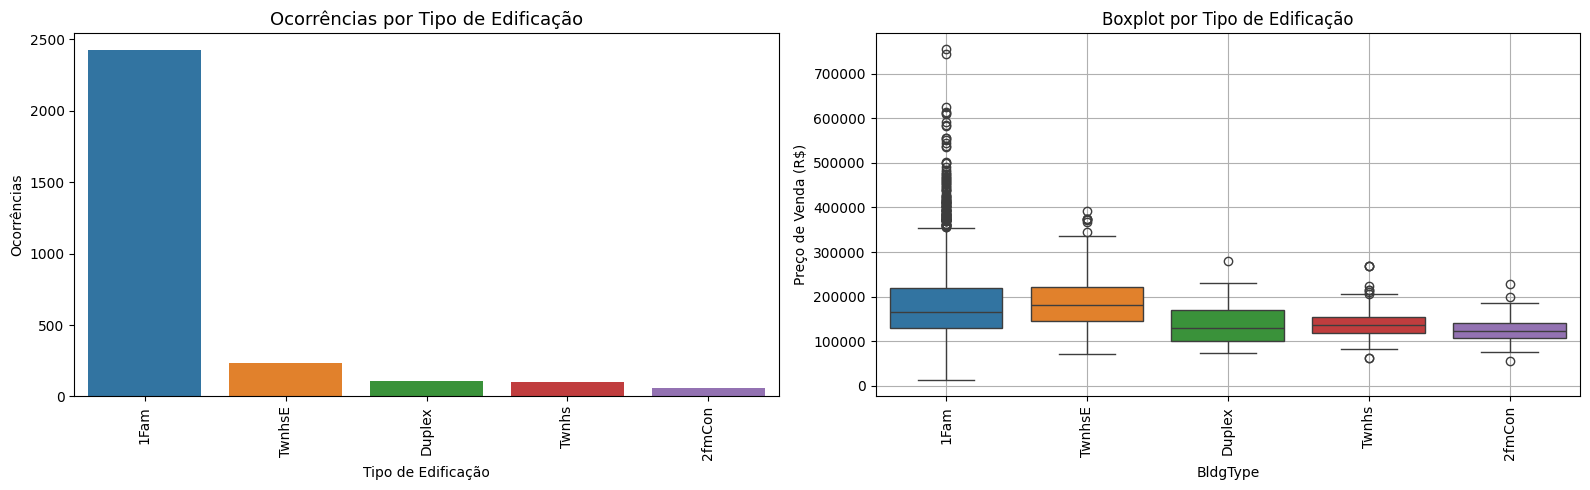

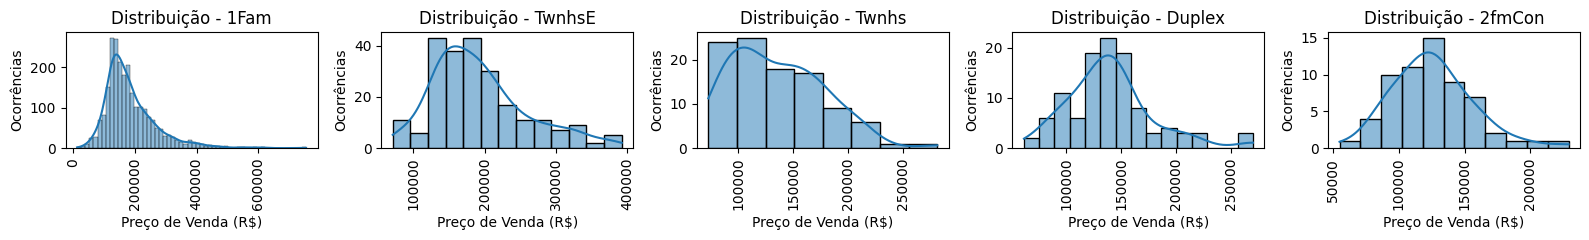

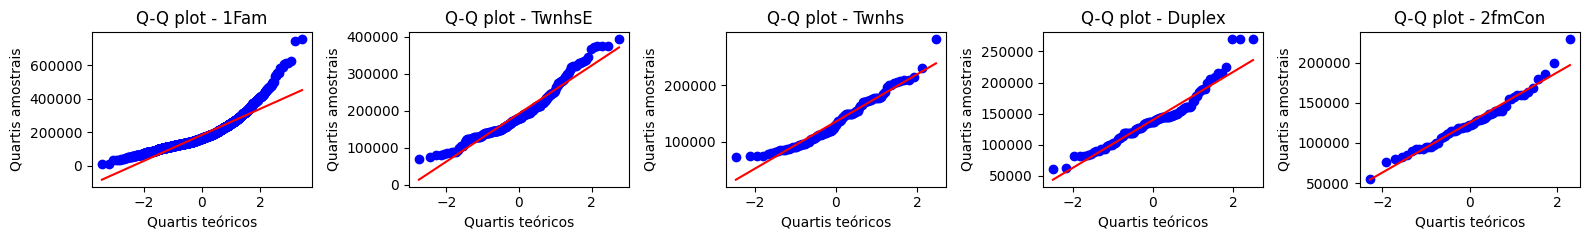

#### Shapiro - Tipo de Edificação

Shapiro-Wilk para a distribuição do tipo de edificação 1Fam:
Estatística=0.876, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Shapiro-Wilk para a distribuição do tipo de edificação TwnhsE:
Estatística=0.943, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Shapiro-Wilk para a distribuição do tipo de edificação Twnhs:
Estatística=0.953, p=0.001
Amostra não parece ser normalmente distribuída (rejeita H0)
Shapiro-Wilk para a distribuição do tipo de edificação Duplex:
Estatística=0.932, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Shapiro-Wilk para a distribuição do tipo de edificação 2fmCon:
Estatística=0.970, p=0.136
Amostra parece ser normalmente distribuída (falha em rejeitar H0)


#### Kolmogorov-Smirnov - Tipo de Edificação

Kolmogorov-Smirnov para a distribuição do tipo de edificação 1Fam:
Estatística=1.000, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Kolmogorov-Smirnov para a distribuição do tipo de edificação TwnhsE:
Estatística=1.000, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Kolmogorov-Smirnov para a distribuição do tipo de edificação Twnhs:
Estatística=1.000, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Kolmogorov-Smirnov para a distribuição do tipo de edificação Duplex:
Estatística=1.000, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Kolmogorov-Smirnov para a distribuição do tipo de edificação 2fmCon:
Estatística=1.000, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)


In [11]:
display(Markdown(f"""
Building Type ou Tipo de Edificação normalmente descreve o tipo de edificação residencial, classificando as propriedades de acordo com a sua configuração estrutural. No contexto de conjuntos de dados imobiliários — como o famoso conjunto “Ames Housing” — essa variável costuma indicar o arranjo das unidades habitacionais em relação umas às outras. Exemplos comuns incluem:
"""))

df_counts = df['BldgType'].value_counts(dropna=False).to_frame().rename(columns={'count':'Ocorrências'})
nulos = df['BldgType'].isna().sum()

display(Markdown(f"""
**Tipo de Variável**: Categórica Ordinal \\
**Valores Nulos**: {nulos}
"""))

display(Markdown(f"""
**Ocorrências por Tipo de Edificação**
"""))
display(df_counts)

display(Markdown(f"""
**1Fam (Single-Family Detached ou  Habitação Unifamiliar Isolada):**
Uma casa unifamiliar isolada, sem paredes compartilhadas com outras residências. Geralmente é um imóvel independente construído em um único lote, oferecendo maior privacidade e controle sobre o espaço externo.

**2FmCon (Two-Family Conversion ou Habitação Bifamiliar Convertida):**
Originalmente uma única residência que foi convertida em duas unidades de moradia independentes, geralmente com entradas separadas. Pode ter sido uma casa grande dividida internamente para acomodar duas famílias.

**Duplx (Duplex ou Habitação Bifamiliar (Duplex)):**
Uma construção projetada desde o início para abrigar duas unidades residenciais, uma ao lado da outra ou uma acima da outra, mantendo certa simetria e estrutura pensada para uso duplo desde o planejamento inicial.

**TwnhsE (Townhouse End Unit ou Moradia em Banda (Unidade de Extremidade)):**
Uma unidade de casa geminada localizada nas extremidades da fileira. Assim, ela compartilha apenas uma parede comum com a unidade vizinha e possui geralmente uma área externa maior ou mais diferenciada em um dos lados.

**TwnhsI (Townhouse Inside Unit ou Moradia em Banda (Unidade Interna)):**
Uma unidade de casa geminada localizada no meio da fileira, compartilhando paredes com as propriedades vizinhas em ambos os lados. Essas unidades, por estarem entre duas outras, costumam ter menos janelas laterais e menor exposição externa, se comparadas às unidades de extremidade.
"""))

###########################################################################
# gráficos de distribuição
###########################################################################
fig, ax = plt.subplots(1, 2, figsize=default_figsize)

# Subplot 1: histograma
plt.subplot(1, 2, 1)
sns.barplot(x='BldgType', y='Ocorrências', data=df_counts, ax=ax[0], hue='BldgType')
plt.title(r'Ocorrências por Tipo de Edificação', fontsize=13)
plt.xlabel(r"Tipo de Edificação")
plt.ylabel('Ocorrências')
plt.xticks(rotation=90)

# # Subplot 2: Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x='BldgType', y='SalePrice', data=df, ax=ax[1], hue='BldgType')
plt.title('Boxplot por Tipo de Edificação')
plt.ylabel('Preço de Venda (R$)')
plt.xlabel('BldgType')
plt.xticks(ticks=range(len(df_counts.index)), labels=df_counts.index, rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()



###########################################################################
# imprimir o histograma e distribuição de cada categoria
###########################################################################
top = df['BldgType'].drop_duplicates().to_list()
total_cat = len(top)

fig, ax = plt.subplots(1, total_cat, figsize=default_figsize_small)

for i, categoria in enumerate(top):
    plt.subplot(1, total_cat, i+1)
    sns.histplot(df[df['BldgType'] == categoria]['SalePrice'], kde=True)
    plt.title(f'Distribuição - {categoria}')
    plt.xlabel('Preço de Venda (R$)')
    plt.ylabel('Ocorrências')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# fazer o qq plot para cada um dos top bairros selecionados
fig, ax = plt.subplots(1, total_cat, figsize=default_figsize_small)

for i, categoria in enumerate(top):
    plt.subplot(1, total_cat, i+1)
    df_tmp = df[df['BldgType'] == categoria]
    stats.probplot(df_tmp['SalePrice'], dist="norm", plot=plt)
    plt.title(f'Q-Q plot - {categoria}')
    plt.xlabel('Quartis teóricos')
    plt.ylabel('Quartis amostrais')

plt.tight_layout()
plt.show()

# Teste de Shapiro-Wilk para cada um dos top bairros selecionados
display(Markdown('#### Shapiro - Tipo de Edificação'))
for categoria in top:
    s, p = shapiro(df[df['BldgType'] == categoria]['SalePrice'])
    print(f'Shapiro-Wilk para a distribuição do tipo de edificação {categoria}:')
    print(f'Estatística={s:.3f}, p={p:.3f}')
    alpha = 0.05
    if p > alpha:
        print('Amostra parece ser normalmente distribuída (falha em rejeitar H0)')
    else:
        print('Amostra não parece ser normalmente distribuída (rejeita H0)')


# Teste de Kolmogorov-Smirnov para cada um dos top bairros selecionados
display(Markdown('#### Kolmogorov-Smirnov - Tipo de Edificação'))
for categoria in top:
    s, p = stats.kstest(df[df['BldgType'] == categoria]['SalePrice'], 'norm')
    print(f'Kolmogorov-Smirnov para a distribuição do tipo de edificação {categoria}:')
    print(f'Estatística={s:.3f}, p={p:.3f}')
    alpha = 0.05
    if p > alpha:
        print('Amostra parece ser normalmente distribuída (falha em rejeitar H0)')
    else:
        print('Amostra não parece ser normalmente distribuída (rejeita H0)')

## LotArea

In [12]:
df_preco_venda = df['LotArea'].describe().to_frame()
nulos = df['LotArea'].isna().sum()

# exibir a d3escritiva e nulos
display(df_preco_venda)

# escrever uma pequena análise a respeito 
display(Markdown(f"""
A área do lote varia de {df['LotArea'].min():.0f} a {df['LotArea'].max():.0f}, com uma média de {df['LotArea'].mean():.0f} e mediana de {df['LotArea'].median():.0f}.
O desvio padrão é de {df['LotArea'].std():.0f}. A unidade de medida é de pés quadrados.
Total de Valores Nulos: {nulos}.
"""))

,LotArea
count,2930.000000
mean,10147.921843
std,7880.017759
min,1300.000000
25%,7440.250000
50%,9436.500000
75%,11555.250000
max,215245.000000



A área do lote varia de 1300 a 215245, com uma média de 10148 e mediana de 9436.
O desvio padrão é de 7880. A unidade de medida é de pés quadrados.
Total de Valores Nulos: 0.


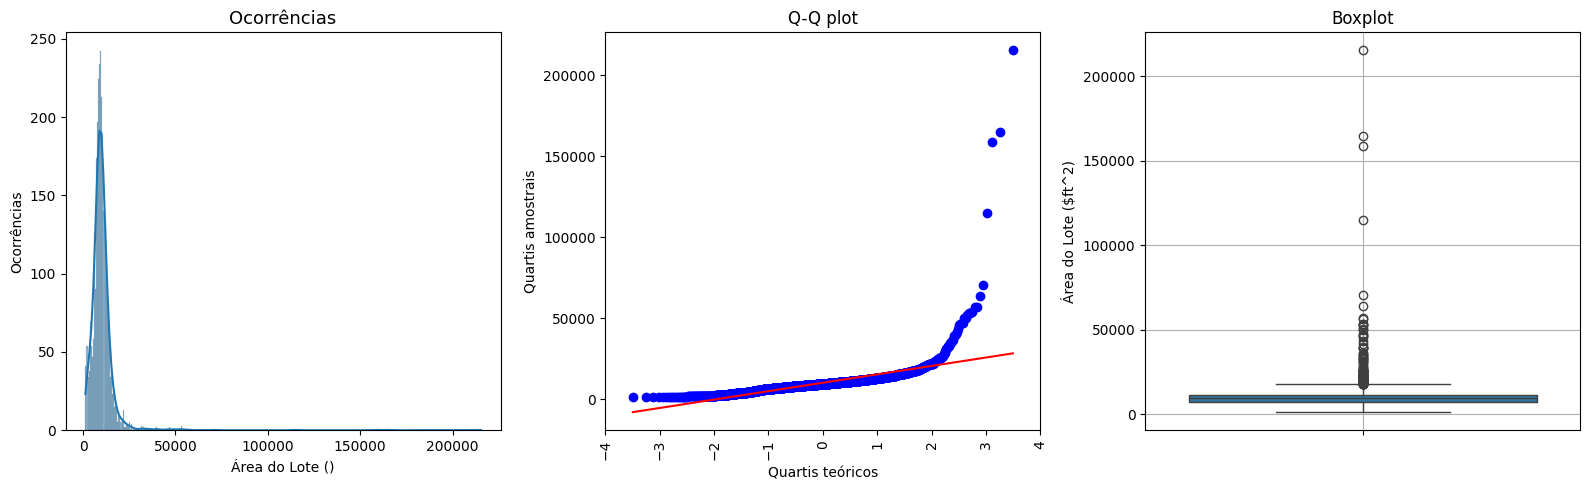

Shapiro-Wilk para a distribuição original:
Estatística=0.436, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)


In [13]:
plt.figure(figsize=default_figsize)

# Subplot 1: histograma
plt.subplot(1, 3, 1)
sns.histplot(df['LotArea'], kde=True)
plt.title(r'Ocorrências', fontsize=13)
plt.xlabel(r"Área do Lote ()")
plt.ylabel('Ocorrências')

# Subplot 2: QQ-plot
plt.subplot(1, 3, 2)
stats.probplot(df['LotArea'], dist="norm", plot=plt)
plt.xticks(ticks=np.arange(-4, 5, 1))
# girar xaxis
plt.xticks(rotation=90)
plt.title('Q-Q plot')
plt.xlabel('Quartis teóricos')
plt.ylabel('Quartis amostrais')

# Subplot 3: Boxplot
plt.subplot(1, 3, 3)
sns.boxplot(y=df['LotArea'])
plt.title('Boxplot')
plt.ylabel('Área do Lote ($ft^2)')
plt.xlabel('')
plt.grid(True)

plt.tight_layout()
plt.show()

# Teste de Shapiro-Wilk 
s, p = shapiro(df['LotArea'])
print('Shapiro-Wilk para a distribuição original:')
print('Estatística=%.3f, p=%.3f' % (s, p))
alpha = 0.05
if p > alpha:
    print('Amostra parece ser normalmente distribuída (falha em rejeitar H0)')
else:
    print('Amostra não parece ser normalmente distribuída (rejeita H0)')

## GarageArea

## YearBuilt

# Regressão Linear

## Validação dos Pressupostos

## Regressão Robusta